## Client is a major mobile telecommunication network provider in the US. They are experiencing issues related to customer churn or attrition i.e. customers cancelling their accounts and possibly switching to other competitor services.

Here are some of the questions you need to think about and address [link] (

# Importing the Libraries


In [283]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [284]:
df_train=pd.read_csv('Churn History Dataset.csv')
df_train

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77.0,26.55,...,126,18.32,279.1,83.0,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57.0,39.29,...,55,13.04,191.3,123.0,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109.0,30.74,...,58,24.55,191.9,91.0,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105.0,36.35,...,84,13.57,139.2,137.0,6.26,5.0,10,1.35,2,True.


In [364]:
df_test=pd.read_csv('Churn Test Dataset.csv')

In [365]:
df_test

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,HI,101,510,354-8814,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7210,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9480,yes,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9103,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3646,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,FL,113,415,395-3867,no,no,0,244.7,97,55.13,...,70,13.46,215.1,90,9.68,13.6,6,3.67,1,True.
1668,NE,23,415,391-5977,no,no,0,155.6,122,30.07,...,82,15.94,50.9,130,2.29,10.6,5,2.86,1,True.
1669,WV,166,408,403-2223,no,yes,41,196.7,109,33.44,...,107,14.47,198.3,94,8.92,11.0,2,2.97,1,True.
1670,GA,69,408,420-7243,no,no,0,215.9,122,36.70,...,114,14.93,301.8,129,13.58,6.1,6,1.65,3,True.


In [292]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3332 non-null   float64
 9   total day charge               3332 non-null   float64
 10  total eve minutes              3331 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3332 non-null   f

In [293]:
df_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3332.000000,3332.000000,3331.000000,3333.000000,3332.000000,3333.000000,3331.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,190.740294,103.218788,101.768574,201.005734,100.343834,17.085633,201.808803,100.373762,16.062715,10.523132,4.488749,13.128689,1.572757
std,39.822106,42.371290,13.688365,598.879213,128.891770,4025.094680,50.709102,23.781417,4.309621,75.438537,24.880650,405.568376,12.241776,2.513638,598.319452,1.430420
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.600000,114.000000,36.825000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,34545.000000,7100.000000,232343.000000,363.700000,850.000000,30.910000,3434.340000,987.000000,23423.000000,600.600000,34.000000,34545.000000,34.000000


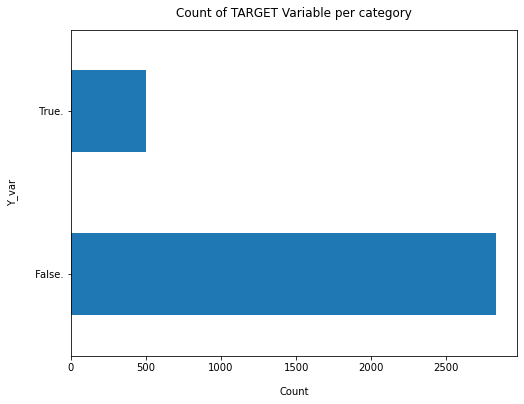

In [295]:
df_train['Y_var'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Y_var", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [296]:
100*df_train['Y_var'].value_counts()/len(df_train['Y_var'])

 False.    84.878488
 True.     15.121512
Name: Y_var, dtype: float64

data is hightly imbalanced 85:15


In [297]:
df_train.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 1
total eve minutes                2
total eve calls                  0
total eve charge                 1
total night minutes              0
total night calls                2
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Y_var                            0
dtype: int64

In [211]:
df.dropna(how = 'any', inplace = True)

In [298]:
df_train.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 1
total eve minutes                2
total eve calls                  0
total eve charge                 1
total night minutes              0
total night calls                2
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Y_var                            0
dtype: int64

### Q1- Performing EDA , Attributes reposnsible for churn behaviour and outlier handling 

In [299]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3332 non-null   float64
 9   total day charge               3332 non-null   float64
 10  total eve minutes              3331 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3332 non-null   f

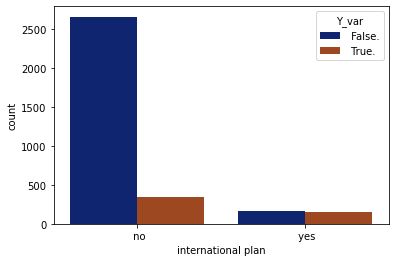

In [300]:
sns.countplot(df_train["international plan"], hue=df_train["Y_var"], palette = "dark")
plt.show()

In [301]:
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"]

df_train.groupby(["Y_var"])[columns_to_show].agg(['mean', 'std', 'max', 'min'])

total day minutes                           total eve minutes  \
                     mean         std      max  min              mean   
Y_var                                                                   
 False.        187.218240  648.133852  34545.0  0.0        199.059830   
 True.         210.509921  116.540718   2323.5  0.0        211.946123   

                                total night minutes                             
               std    max   min                mean         std      max   min  
Y_var                                                                           
 False.  50.271494  361.8   0.0          200.249099   51.031804   395.00  23.2  
 True.   51.808570  363.7  60.8          210.563571  151.546075  3434.34  47.4

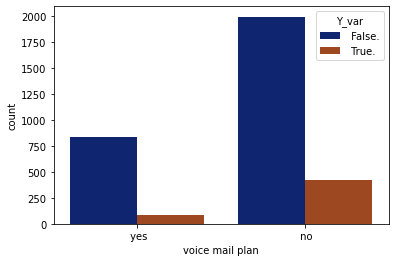

In [302]:
sns.countplot(df_train["voice mail plan"], hue=df_train["Y_var"], palette = "dark")
plt.show()

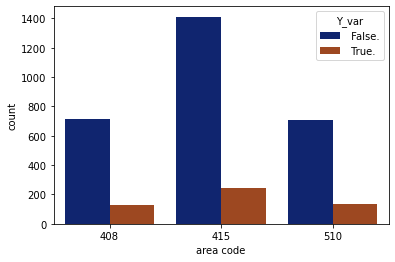

In [303]:
sns.countplot(df_train["area code"], hue=df_train["Y_var"], palette = "dark")
plt.show()

#### Note: By visulaizing the data we can see that area code '415' has more churn behaviour than other two area code 

In [304]:
df_train['Y_var'] = np.where(df_train.Y_var == 'True',1,0)

In [305]:
df_train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,0


In [306]:
df_train["total_charge"] =df_train["total day charge"] + df_train["total eve charge"] + df_train["total night charge"] + df_train["total intl charge"]

<AxesSubplot:xlabel='total day charge'>

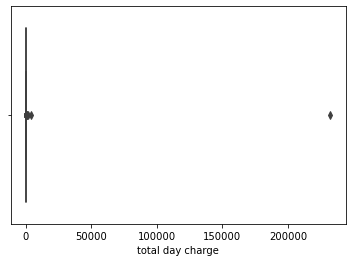

In [307]:
sns.boxplot(df_train['total day charge'])

In [311]:
a=np.where(df_train['total day charge']>1000)

In [312]:
df_train.drop(df_train.index[a],axis=0,inplace=True)

<AxesSubplot:xlabel='total day charge'>

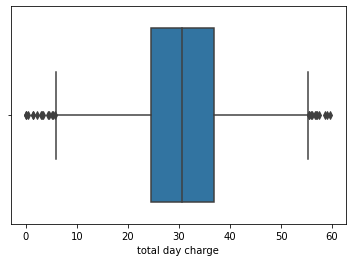

In [313]:
sns.boxplot(df_train['total day charge'])

<AxesSubplot:xlabel='Y_var', ylabel='total day charge'>

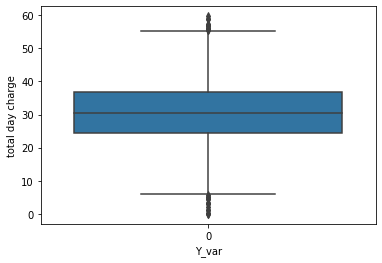

In [314]:
sns.boxplot(x=df_train['Y_var'],y=df_train['total day charge'])

In [69]:
# Q1 = np.percentile(df['total day charge'], 25, interpolation = 'midpoint')
# Q3 = np.percentile(df['total day charge'], 75,interpolation = 'midpoint')
# IQR = Q3 - Q1

In [70]:
# upper = np.where(df['total day charge'] >= (Q3+1.5*IQR))
# lower = np.where(df['total day charge'] <= (Q1-1.5*IQR))

In [71]:
# df.drop(upper[0], inplace = True)
# df.drop(lower[0], inplace = True)

<AxesSubplot:xlabel='Y_var', ylabel='total eve charge'>

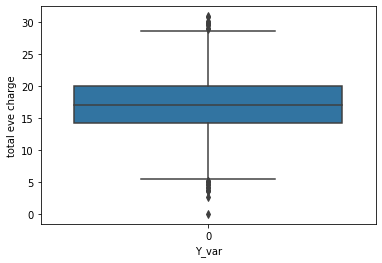

In [315]:
sns.boxplot(x=df_train['Y_var'], y=df_train['total eve charge'])

<AxesSubplot:xlabel='total night charge'>

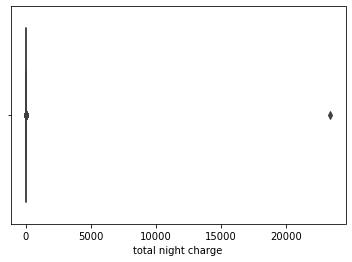

In [316]:
sns.boxplot(df_train['total night charge'])

In [317]:
a=np.where(df_train['total night charge']>5000)
df_train.drop(df_train.index[a],axis=0,inplace=True)

<AxesSubplot:xlabel='Y_var', ylabel='total night charge'>

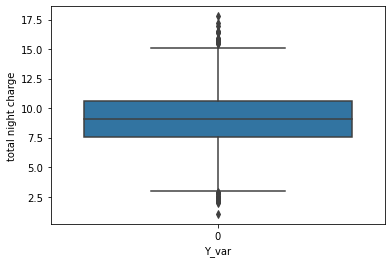

In [318]:
sns.boxplot(x=df_train['Y_var'],y=df_train['total night charge'])

In [ ]:
####Tried to implement z score method for dropping outlier

In [28]:
from scipy import stats
df[(np.abs(stats.zscore(df['total day charge'])) < 3)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var,total_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,16.78,244.7,91.0,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0,62.29
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,12.61,186.9,121.0,8.41,10.1,3,2.73,3,0,52.09
5,AL,118,510,391-8027,yes,no,0,223.4,98.0,37.98,...,18.75,203.9,118.0,9.18,6.3,6,1.70,0,0,67.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77.0,26.55,...,18.32,279.1,83.0,12.56,9.9,6,2.67,2,0,60.10
3329,WV,68,415,370-3271,no,no,0,231.1,57.0,39.29,...,13.04,191.3,123.0,8.61,9.6,4,2.59,3,0,63.53
3330,RI,28,510,328-8230,no,no,0,180.8,109.0,30.74,...,24.55,191.9,91.0,8.64,14.1,6,3.81,2,0,67.74
3331,CT,184,510,364-6381,yes,no,0,213.8,105.0,36.35,...,13.57,139.2,137.0,6.26,5.0,10,1.35,2,0,57.53


In [279]:
####Relationship between total day chareges, total eve charges and total night charges on the total charges.

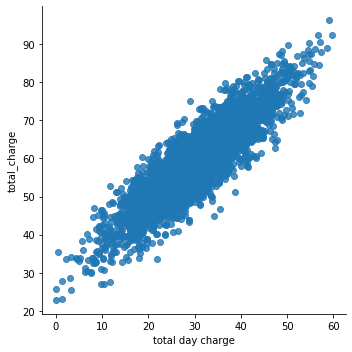

In [319]:
sns.lmplot(data=df_train, x='total day charge', y='total_charge', fit_reg=False)

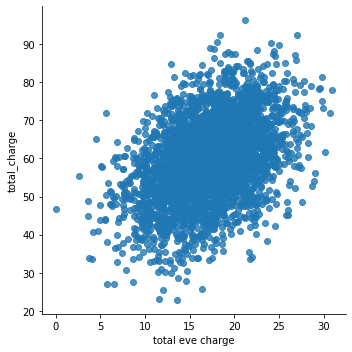

In [320]:
sns.lmplot(data=df_train, x='total eve charge', y='total_charge', fit_reg=False)

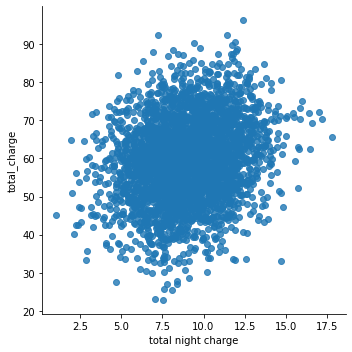

In [96]:
sns.lmplot(data=df_train, x='total night charge', y='total_charge', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

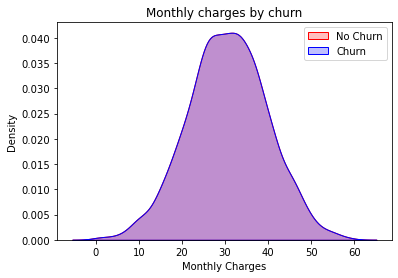

In [110]:
Mth = sns.kdeplot(df.loc[(df['Y_var']==1),
            'total day charge'],color="Red", shade = True,Label='total day charge')
Mth = sns.kdeplot(df.loc[(df['Y_var']==1),
            'total day charge'], color="Blue", shade= True, Label='total eve charge')
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<AxesSubplot:xlabel='number customer service calls'>

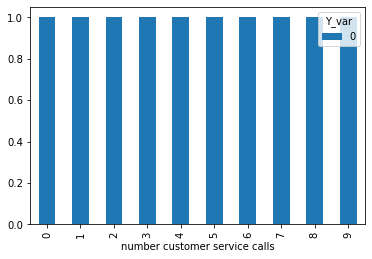

In [325]:
pd.crosstab(index=df_train['number customer service calls'] , columns=df_train['Y_var'],normalize='index').plot(kind = 'bar',stacked=True)

# Convert all categorical variables into dummy variables

In [216]:
categorical_cols = ['international plan','voice mail plan','Y_var']
cat = pd.get_dummies(data = df_train[categorical_cols], columns = categorical_cols, drop_first = True)
cat

,international plan_ yes,voice mail plan_ yes,Y_var_ True.
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3328,0,1,0
3329,0,0,0
3330,0,0,0
3331,1,0,1


In [217]:
df_train = pd.concat([df_train,cat], axis = 1)
df_train = df_train.drop(columns=categorical_cols)

In [218]:
df_train

,state,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan_ yes,voice mail plan_ yes,Y_var_ True.
0,KS,128,415,382-4657,25,265.1,110.0,45.07,197.4,99,...,244.7,91.0,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,415,371-7191,26,161.6,123.0,27.47,195.5,103,...,254.4,103.0,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,415,358-1921,0,243.4,114.0,41.38,121.2,110,...,162.6,104.0,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,375-9999,0,299.4,7100.0,1500.90,61.9,88,...,196.9,89.0,8.86,600.6,7,1.78,2,1,0,0
4,OK,75,415,330-6626,0,166.7,113.0,28.34,148.3,122,...,186.9,121.0,8.41,10.1,3,2.73,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,36,156.2,77.0,26.55,215.5,126,...,279.1,83.0,12.56,9.9,6,2.67,2,0,1,0
3329,WV,68,415,370-3271,0,231.1,57.0,39.29,153.4,55,...,191.3,123.0,8.61,9.6,4,2.59,3,0,0,0
3330,RI,28,510,328-8230,0,180.8,109.0,30.74,288.8,58,...,191.9,91.0,8.64,14.1,6,3.81,2,0,0,0
3331,CT,184,510,364-6381,0,213.8,105.0,36.35,159.6,84,...,139.2,137.0,6.26,5.0,10,1.35,2,1,0,1


### Q-4 Important Churn Factors: 

In [133]:
df_train.corr()['Y_var_ True.'].sort_values(ascending=False)

Y_var_ True.                     1.000000
international plan_ yes          0.309010
number customer service calls    0.212751
total eve minutes                0.091003
total eve charge                 0.090881
total night minutes              0.048991
total night charge               0.041198
total intl charge                0.041127
total eve calls                  0.030209
total night calls                0.030097
total intl minutes               0.029362
account length                   0.021987
area code                        0.015084
total day minutes                0.013936
total day calls                 -0.005728
total day charge                -0.006270
total intl calls                -0.033432
number vmail messages           -0.089270
voice mail plan_ yes            -0.101883
Name: Y_var_ True., dtype: float64

###  international plan , Number of customer service calls, voice mail plan tends to have a significant impact on the churn

In [219]:
df_train.drop(['state' , 'account length','phone number'] , axis = 1,inplace=True)

In [220]:
df_train.isnull().sum()

area code                        0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 1
total eve minutes                2
total eve calls                  0
total eve charge                 1
total night minutes              0
total night calls                2
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
international plan_ yes          0
voice mail plan_ yes             0
Y_var_ True.                     0
dtype: int64

In [232]:
df_train[df_train['total night calls'].isnull()].index.tolist()

[749]

In [230]:
df_train.drop(df_train.index[749],axis=0,inplace=True)

In [231]:
df_train.isnull().sum()

area code                        0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                1
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                1
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
international plan_ yes          0
voice mail plan_ yes             0
Y_var_ True.                     0
dtype: int64

In [233]:
df_train

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan_ yes,voice mail plan_ yes,Y_var_ True.
0,415,25,265.1,110.0,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,0,1,0
1,415,26,161.6,123.0,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0,1,0
2,415,0,243.4,114.0,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0,0,0
3,408,0,299.4,7100.0,1500.90,61.9,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,1,0,0
4,415,0,166.7,113.0,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,36,156.2,77.0,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6,2.67,2,0,1,0
3329,415,0,231.1,57.0,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4,2.59,3,0,0,0
3330,510,0,180.8,109.0,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6,3.81,2,0,0,0
3331,510,0,213.8,105.0,36.35,159.6,84,13.57,139.2,137.0,6.26,5.0,10,1.35,2,1,0,1


In [234]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:,-1]

In [200]:
X.dropna(axis=0,how='all')

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan_ yes,voice mail plan_ yes
0,415,25,265.1,110.0,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,0,1
1,415,26,161.6,123.0,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0,1
2,415,0,243.4,114.0,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0,0
3,408,0,299.4,7100.0,1500.90,61.9,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,1,0
4,415,0,166.7,113.0,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,36,156.2,77.0,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6,2.67,2,0,1
3329,415,0,231.1,57.0,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4,2.59,3,0,0
3330,510,0,180.8,109.0,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6,3.81,2,0,0
3331,510,0,213.8,105.0,36.35,159.6,84,13.57,139.2,137.0,6.26,5.0,10,1.35,2,1,0


In [147]:
y.drop

0

In [201]:
X.isnull().sum()

area code                        0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
international plan_ yes          0
voice mail plan_ yes             0
dtype: int64

In [202]:
X[X['total day calls'].isnull()].index.tolist()

[864]

In [203]:
X.drop(X.index[864],axis=0,inplace=True)

In [204]:
X.isnull().sum()

area code                        0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
international plan_ yes          0
voice mail plan_ yes             0
dtype: int64

### Q2- Building Classification Models such as logistic regression, Decision Tree and Random forest. And Comparing those models based on metrices

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [236]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## LogisticRegression

In [266]:
model_logi = LogisticRegression(random_state=0)

In [267]:
model_logi.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [334]:
x=X_test.dropna()

In [269]:
y_pred_logi=model_logi.predict(x)

In [270]:
model_logi.score(x,y_test)

0.8481203007518797

In [271]:
print(classification_report(y_test, y_pred_logi, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       567
           1       0.42      0.08      0.14        98

    accuracy                           0.85       665
   macro avg       0.64      0.53      0.53       665
weighted avg       0.80      0.85      0.80       665



In [272]:
print(metrics.confusion_matrix(y_test,y_pred_logi))

[[556  11]
 [ 90   8]]


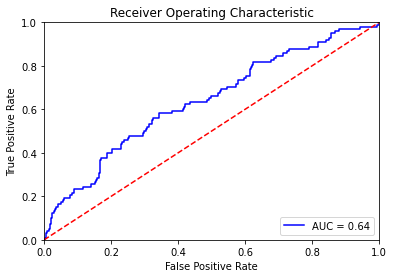

In [331]:
probs = model_logi.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree


In [237]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [238]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [246]:
X_train

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan_ yes,voice mail plan_ yes
19,415,0,224.4,90.0,38.15,159.5,88,13.56,192.8,74.0,8.68,13.0,2,3.51,1,0,0
588,408,0,89.7,118.0,15.25,260.1,79,22.11,170.1,93.0,7.65,13.5,11,3.65,5,0,0
1428,415,0,200.6,117.0,34.10,289.5,120,24.61,98.3,95.0,4.42,11.2,5,3.02,2,1,0
1229,408,0,84.9,77.0,14.43,257.5,109,21.89,210.5,66.0,9.47,7.5,5,2.03,2,0,0
917,415,0,109.1,97.0,18.55,115.7,96,9.83,295.8,84.0,13.31,8.3,6,2.24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,408,0,221.8,97.0,37.71,203.8,134,17.32,215.8,154.0,9.71,8.4,4,2.27,1,1,0
3015,415,25,113.2,96.0,19.24,269.9,107,22.94,229.1,87.0,10.31,7.1,7,1.92,2,0,1
731,415,0,207.2,121.0,35.22,292.5,104,24.86,226.3,103.0,10.18,8.0,1,2.16,2,0,0
1007,408,0,143.3,91.0,24.36,195.5,58,16.62,223.3,95.0,10.05,6.0,7,1.62,1,0,0


In [245]:
X_test[:749]

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan_ yes,voice mail plan_ yes
1352,415,16,90.4,105.0,15.37,201.3,109,17.11,227.1,115.0,10.22,13.1,4,3.54,0,0,1
1170,415,0,199.3,104.0,33.88,224.2,92,19.06,140.1,57.0,6.30,15.2,2,4.10,0,0,0
2759,408,0,115.6,129.0,19.65,167.8,104,14.26,141.8,124.0,6.38,12.6,9,3.40,1,0,0
1782,510,0,218.2,76.0,37.09,169.3,60,14.39,141.1,99.0,6.35,8.0,1,2.16,1,0,0
1415,510,0,142.3,89.0,24.19,204.5,95,17.38,203.1,114.0,9.14,9.1,1,2.46,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,415,0,90.6,130.0,15.40,170.6,100,14.50,137.4,74.0,6.18,5.4,9,1.46,1,0,0
1637,415,0,225.2,93.0,38.28,215.1,120,18.28,241.8,95.0,10.88,9.1,2,2.46,2,0,0
1604,408,0,115.5,73.0,19.64,267.3,83,22.72,114.2,90.0,5.14,13.3,5,3.59,3,0,0
21,408,0,62.4,89.0,10.61,169.9,121,14.44,209.6,64.0,9.43,5.7,6,1.54,5,0,0


In [240]:
X_test.isnull().sum()

area code                        0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                1
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                1
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
international plan_ yes          0
voice mail plan_ yes             0
dtype: int64

In [241]:
X_test[X_test['total night calls'].isnull()].index.tolist()

[749]

In [251]:
x=X_test.dropna()

In [252]:
y_pred=model_dt.predict(x)

In [253]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [255]:
x

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan_ yes,voice mail plan_ yes
1352,415,16,90.4,105.0,15.37,201.3,109,17.11,227.1,115.0,10.22,13.1,4,3.54,0,0,1
1170,415,0,199.3,104.0,33.88,224.2,92,19.06,140.1,57.0,6.30,15.2,2,4.10,0,0,0
2759,408,0,115.6,129.0,19.65,167.8,104,14.26,141.8,124.0,6.38,12.6,9,3.40,1,0,0
1782,510,0,218.2,76.0,37.09,169.3,60,14.39,141.1,99.0,6.35,8.0,1,2.16,1,0,0
1415,510,0,142.3,89.0,24.19,204.5,95,17.38,203.1,114.0,9.14,9.1,1,2.46,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,415,0,90.6,130.0,15.40,170.6,100,14.50,137.4,74.0,6.18,5.4,9,1.46,1,0,0
1637,415,0,225.2,93.0,38.28,215.1,120,18.28,241.8,95.0,10.88,9.1,2,2.46,2,0,0
1604,408,0,115.5,73.0,19.64,267.3,83,22.72,114.2,90.0,5.14,13.3,5,3.59,3,0,0
21,408,0,62.4,89.0,10.61,169.9,121,14.44,209.6,64.0,9.43,5.7,6,1.54,5,0,0


In [260]:
y_test.drop(y_test.index[665],axis=0,inplace=True)

In [262]:
model_dt.score(x,y_test)

0.8736842105263158

In [263]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       567
           1       0.58      0.50      0.54        98

    accuracy                           0.87       665
   macro avg       0.75      0.72      0.73       665
weighted avg       0.87      0.87      0.87       665



In [265]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[532  35]
 [ 49  49]]


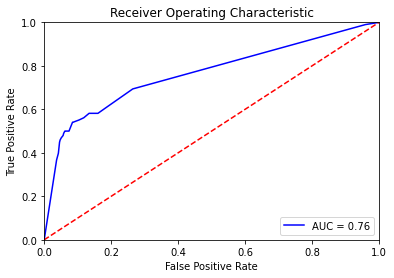

In [332]:
probs = model_dt.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest 

In [273]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [274]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [275]:
y_pred_rf=model_logi.predict(x)

In [276]:
model_rf.score(x,y_test)

0.8827067669172932

In [277]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       567
           1       0.42      0.08      0.14        98

    accuracy                           0.85       665
   macro avg       0.64      0.53      0.53       665
weighted avg       0.80      0.85      0.80       665



In [278]:
print(metrics.confusion_matrix(y_test,y_pred_rf))

[[556  11]
 [ 90   8]]


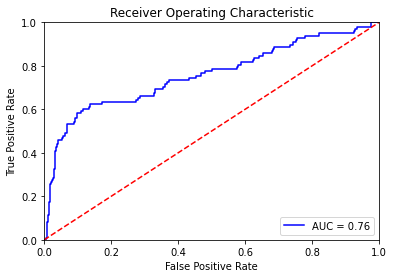

In [333]:
probs = model_rf.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### From the above reports and metrics it is observed that accuracy and roc_auc_score are good in all the models and model performance in the order is Random forest > Decision tree > Logistic regression

### I would recommend to choose Random forest model to the client because false negative is low in RF and f1 score is high for true values.

# To Validate our results we will test it with df_test dataset

In [366]:
df_test

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,HI,101,510,354-8814,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7210,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9480,yes,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9103,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3646,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,FL,113,415,395-3867,no,no,0,244.7,97,55.13,...,70,13.46,215.1,90,9.68,13.6,6,3.67,1,True.
1668,NE,23,415,391-5977,no,no,0,155.6,122,30.07,...,82,15.94,50.9,130,2.29,10.6,5,2.86,1,True.
1669,WV,166,408,403-2223,no,yes,41,196.7,109,33.44,...,107,14.47,198.3,94,8.92,11.0,2,2.97,1,True.
1670,GA,69,408,420-7243,no,no,0,215.9,122,36.70,...,114,14.93,301.8,129,13.58,6.1,6,1.65,3,True.


In [368]:
categorical_df_test = ['international plan','voice mail plan','Churn Indicator']
cat_2 = pd.get_dummies(data = df_test[categorical_df_test] ,columns = categorical_df_test, drop_first = True)

In [369]:
df_test = pd.concat([df_test,cat_2], axis = 1)
df_test = df_test.drop(columns=categorical_df_test)

In [370]:
df_test .drop(['state' , 'account length','phone number'] , axis = 1,inplace=True)

In [371]:
features = df_test.iloc[:, :-1]
target = df_test.iloc[:,-1]

In [372]:
target_pred = model_logi.predict(features)
target_pred_tree = model_dt.predict(features)
target_pred_forest = model_rf.predict(features)

In [373]:
print('Logistic Regression')
print(classification_report(target,target_pred,labels=[0,1]))
print('Decision tree')
print(classification_report(target,target_pred_tree,labels=[0,1]))
print('Random forest')
print(classification_report(target,target_pred_forest,labels=[0,1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1432
           1       0.55      0.11      0.19       240

    accuracy                           0.86      1672
   macro avg       0.71      0.55      0.55      1672
weighted avg       0.82      0.86      0.82      1672

Decision tree
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1432
           1       0.84      0.64      0.73       240

    accuracy                           0.93      1672
   macro avg       0.89      0.81      0.84      1672
weighted avg       0.93      0.93      0.93      1672

Random forest
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1432
           1       0.92      0.54      0.68       240

    accuracy                           0.93      1672
   macro avg       0.92      0.76      0.82      1672
weighted avg       0.93   